In [1]:
import sys
import os
import numpy as np                                # numpy is a collection of python modules for array math.
from matplotlib import pyplot as plt              # A collection of modules. Needed here to display images and graphs.
from matplotlib import pylab                      # A collection of modules. Needed here to plot histograms.
sys.path.append('/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/a212pylibs') # Adds the path to the DataPype module to the system path.
from datapype.datafits import DataFits            # Gets the function that makes datapype io objects from module datafits in package datapype.
from astropy.io import fits                       # Need this if you want to use astropy.io io objects.
from ipywidgets import interact                   # Need this for interactive plots.
from matplotlib.colors import LogNorm             # Machinery for LogNorm scaling of intensities.
from matplotlib.colors import SymLogNorm          # Machinery for SymLogNorm scaling of intensities.
from matplotlib.colors import PowerNorm           # Machinery for LogNorm (e.g., square root) scaling of intensities.
from astropy.stats import mad_std                 # The median absolute deviation, a more robust estimator than std.
import scipy.ndimage as nd                        # Various algorithms for image transformations.


# ## Use this if dah_functions is a subdirectory of a212pylibs.
# from dah_functions.dah_functions import head
# from dah_functions.dah_functions import displaypic
# from dah_functions.dah_functions import displaypic2
# from dah_functions.dah_functions import show_image
# from dah_functions.dah_functions import blink_images
# from dah_functions.dah_functions import blink2images
# from dah_functions.dah_functions import rowplot
# from dah_functions.dah_functions import colplot
# from dah_functions.dah_functions import rowcolplot

## Use this if dah_functions is stored in a different path from a212pylibs.
## The following adds a bunch of functions in a module stored in the path below.
sys.path.append('/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/a212pylibs/dah_functions') # Adds path to MyCode directory on my computer to system python path.
from dah_functions_2 import head
from dah_functions_2 import displaypic
from dah_functions_2 import displaypic2
from dah_functions_2 import show_image
from dah_functions_2 import blink_images
from dah_functions_2 import rowplot
from dah_functions_2 import colplot
from dah_functions_2 import rowcolplot
from dah_functions_2 import moments
from dah_functions_2 import quickpic
from dah_functions_2 import getpatch
from dah_functions_2 import stackfits

###############################################################################
# ## Don't need the following in this notebook. Hold on to them for now.
# import time        
# import re
# import scipy.stats
# import matplotlib.colors as colors
# import configobj  #What is this? Where does it come from?
###############################################################################

In [2]:
len(get_ipython().user_ns.keys())

48

In [3]:
datapath = '/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/24inch_data/190526/dark'
median_path = '/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/24inch_data/190526/dark/mdark'

In [4]:
whichpath = datapath

## For ALL the files in the directory.
allfiles = [f for f in os.listdir(datapath)]

allfiles = sorted(allfiles)       ## This is necessary on my Mac, may not be for others?
for i in range(len(allfiles)):
    print( i, allfiles[i])

0 .DS_Store
1 dark_190526_AA-001_020s.fit
2 dark_190526_AA-001_040s.fit
3 dark_190526_AA-001_100s.fit
4 dark_190526_AA-001_180s.fit
5 dark_190526_AA-001_bias.fit
6 dark_190526_AA-002_020s.fit
7 dark_190526_AA-002_040s.fit
8 dark_190526_AA-002_100s.fit
9 dark_190526_AA-002_180s.fit
10 dark_190526_AA-002_bias.fit
11 dark_190526_AA-003_020s.fit
12 dark_190526_AA-003_040s.fit
13 dark_190526_AA-003_100s.fit
14 dark_190526_AA-003_180s.fit
15 dark_190526_AA-003_bias.fit
16 dark_190526_AA-004_020s.fit
17 dark_190526_AA-004_040s.fit
18 dark_190526_AA-004_100s.fit
19 dark_190526_AA-004_180s.fit
20 dark_190526_AA-004_bias.fit
21 dark_190526_AA-005_020s.fit
22 dark_190526_AA-005_040s.fit
23 dark_190526_AA-005_100s.fit
24 dark_190526_AA-005_180s.fit
25 dark_190526_AA-005_bias.fit
26 dark_190526_AA-006_020s.fit
27 dark_190526_AA-006_040s.fit
28 dark_190526_AA-006_100s.fit
29 dark_190526_AA-006_180s.fit
30 dark_190526_AA-006_bias.fit
31 dark_190526_AA-007_020s.fit
32 dark_190526_AA-007_040s.fit
33 da

# This part makes a graph based on ALL the images, each data point is an image.

In [ ]:
whichpath = datapath

somefiles = [f for f in os.listdir(whichpath) if '.fit' in f and '_bias' not in f and 'mdark' not in f]

somefiles = sorted(somefiles)       ## This is necessary on my Mac, may not be for others?
for i in range(len(somefiles)):
    print( i, somefiles[i])

In [ ]:
acceptlist = True             # True if you want to accept all the files in somefiles.
contiguous = True             # True if you want to accept a contiguous subset of somefiles.
startfile, endfile = 5,9      # The first and last files in a contiquous subset.
flist = [0,3,4,5,6,7,8]        # An explicit list of the files you want to accept.

if acceptlist == True:
    files = somefiles
    for i in range(len(files)):
        print(i, files[i])
else:
    if contiguous == True:
        files = somefiles[startfile:endfile+1]
        for i in range(len(files)):
            print( i, files[i])
    else:
        files = []
        for i in range(len(flist)):
            files.append(somefiles[flist[i]])
        for i in range(len(files)):
            print( i, flist[i], files[i])

In [ ]:
## Make a stack of images.
image, headlist, rows, cols, imedian, imad = stackfits(datapath,files)

In [ ]:
import scipy.stats

exptime = np.zeros(len(headlist))
for i in range(len(headlist)):
    head = headlist[i]
    exptime[i] = head['EXPOSURE']

pixel_dark_value = image[:,1000,1000]

corrs = np.zeros((1024,1024))
for i in range(1024):
    for j in range(1024):
        corrs[i,j] = scipy.stats.pearsonr(exptime, image[:,i,j])[0]
    
print(corrs)
#plt.plot(exptime)
#plt.plot(exptime, pixel, 'k.')

# This part makes a graph just based on the medians. It is the useful part of this code.

In [5]:
whichpath2 = median_path

## For ALL the files in the directory.
allfiles = [f for f in os.listdir(median_path)]

allfiles = sorted(allfiles)       ## This is necessary on my Mac, may not be for others?
for i in range(len(allfiles)):
    print( i, allfiles[i])

0 .DS_Store
1 mdark_190526_AA_020s.fits
2 mdark_190526_AA_040s.fits
3 mdark_190526_AA_100s.fits
4 mdark_190526_AA_180s.fits
5 mfdark


In [6]:
whichpath2 = median_path

somefiles = [f for f in os.listdir(whichpath2) if '.fit' in f]

somefiles = sorted(somefiles)       ## This is necessary on my Mac, may not be for others?
for i in range(len(somefiles)):
    print( i, somefiles[i])

0 mdark_190526_AA_020s.fits
1 mdark_190526_AA_040s.fits
2 mdark_190526_AA_100s.fits
3 mdark_190526_AA_180s.fits


In [7]:
acceptlist = True             # True if you want to accept all the files in somefiles.
contiguous = True             # True if you want to accept a contiguous subset of somefiles.
startfile, endfile = 5,9      # The first and last files in a contiquous subset.
flist = [0,3,4,5,6,7,8]        # An explicit list of the files you want to accept.

if acceptlist == True:
    files = somefiles
    for i in range(len(files)):
        print(i, files[i])
else:
    if contiguous == True:
        files = somefiles[startfile:endfile+1]
        for i in range(len(files)):
            print( i, files[i])
    else:
        files = []
        for i in range(len(flist)):
            files.append(somefiles[flist[i]])
        for i in range(len(files)):
            print( i, flist[i], files[i])

0 mdark_190526_AA_020s.fits
1 mdark_190526_AA_040s.fits
2 mdark_190526_AA_100s.fits
3 mdark_190526_AA_180s.fits


In [8]:
## Make a stack of images.
image, headlist, rows, cols, imedian, imad = stackfits(median_path,files)

GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration


rows = 1024    cols = 1024
image.shape = (4, 1024, 1024)

0 mdark_190526_AA_020s.fits


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



1 mdark_190526_AA_040s.fits

2 mdark_190526_AA_100s.fits

3 mdark_190526_AA_180s.fits


In [9]:
import scipy.stats

exptime = np.zeros(len(headlist))
for i in range(len(headlist)):
    head = headlist[i]
    exptime[i] = head['EXPOSURE']
    
#plt.plot(exptime)

pixel_dark_value = image[:,1000,1000]

#plt.plot(exptime, pixel, 'k.')

corrs = np.zeros((1024,1024))
for i in range(1024):
    for j in range(1024):
        corrs[i,j] = scipy.stats.pearsonr(exptime, image[:,i,j])[0]
    
print(corrs)

/Users/benkoch/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


[[0.9848809  0.99768083 0.99482044 ... 0.93680504 0.97546862 0.99341737]
 [0.99617783 0.99605058 0.96986863 ... 0.84701902 0.96787096 0.99617783]
 [0.99859914 0.99615062 0.96950155 ... 0.98476353 0.98974691 0.96621759]
 ...
 [0.97385168 0.95456558 0.99654333 ... 0.99479712 0.99341737 0.96621759]
 [0.95602222 0.9999523  0.9791224  ... 0.85867758 0.99111258 0.97862901]
 [0.95158927 0.95146299 0.99293693 ... 0.98373875 0.96520097 0.98373875]]


In [10]:
print(scipy.stats.pearsonr(exptime, image[:,1023,0]))

(0.951589272347937, 0.04841072765206301)


/Users/benkoch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


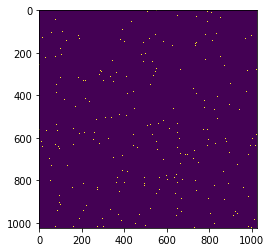

In [11]:
badpix = corrs < 0.75
plt.imshow(badpix)

In [12]:
locs = np.array(np.where(badpix == True))

for i in range(locs.shape[1]):
   print(locs[0,i],locs[1,i])

0 80
0 169
0 403
0 574
0 723
0 867
1 385
1 406
1 423
1 505
1 506
2 551
2 731
3 152
3 190
3 316
3 333
4 277
4 519
6 424
6 512
6 907
7 328
7 509
7 791
8 453
8 736
9 857
11 266
11 810
13 523
13 531
14 228
14 404
16 626
17 278
17 610
18 479
18 585
18 764
19 360
19 850
20 390
20 430
20 805
20 915
21 101
21 259
21 291
21 499
21 750
22 57
22 60
22 691
22 714
22 968
23 281
23 371
23 410
24 144
24 583
25 79
25 357
25 381
25 606
25 650
25 854
26 91
26 116
26 367
26 616
26 752
27 167
27 627
28 6
28 477
28 482
28 746
29 108
29 775
30 292
30 590
30 739
31 76
31 277
32 286
32 427
32 553
33 163
34 554
35 668
35 852
36 226
36 301
36 735
37 106
37 181
37 270
38 97
38 209
38 293
38 629
38 684
38 723
39 432
40 118
40 129
41 1013
42 382
42 690
42 961
43 142
44 77
44 208
44 257
44 305
44 820
44 905
45 205
45 472
45 508
45 650
45 722
46 97
46 172
47 162
48 105
48 325
48 744
48 1015
49 95
49 287
49 333
49 384
49 525
49 835
50 570
51 74
51 140
52 112
52 325
52 332
52 436
53 140
53 809
53 841
54 434
54 482
54 

456 420
456 924
457 121
457 484
457 545
457 777
457 887
458 363
458 540
458 683
458 688
459 373
459 460
459 927
460 84
460 122
460 344
460 547
460 574
460 806
461 418
461 490
461 706
461 741
461 827
462 93
462 175
462 239
462 283
462 448
462 463
462 631
463 247
463 392
463 421
463 490
463 561
463 732
463 797
464 47
464 99
464 225
464 288
464 298
464 562
464 610
464 794
464 870
464 876
465 69
465 159
465 261
465 431
465 582
465 601
465 698
466 154
466 169
466 325
466 331
466 471
466 496
466 498
466 714
466 829
466 931
467 289
467 775
467 824
467 941
468 165
468 267
468 470
468 627
468 775
468 784
468 801
468 826
469 115
469 136
469 253
469 274
469 767
469 785
470 551
470 897
471 191
471 372
471 623
471 882
471 894
472 90
472 109
473 433
474 341
475 118
475 508
475 658
475 771
475 898
475 952
475 953
476 187
476 229
476 460
476 548
476 618
476 654
476 882
477 245
477 820
477 873
477 949
477 971
478 174
478 461
478 591
478 706
478 743
478 835
479 48
479 494
479 1005
480 22
480 203
480 283

683 634
683 695
683 879
683 901
683 947
683 987
684 20
684 92
684 414
684 561
684 653
685 163
685 253
685 267
685 342
685 382
685 657
686 137
686 315
686 452
686 591
687 358
687 657
687 726
688 131
688 205
688 286
688 371
688 441
688 629
689 478
689 661
689 674
689 726
689 784
690 221
690 618
690 905
691 96
692 325
692 349
692 644
692 714
692 812
692 958
693 343
693 380
693 406
693 575
693 646
693 722
693 754
693 905
694 58
694 287
694 451
694 546
694 665
694 906
694 930
695 279
695 374
695 379
695 417
695 434
695 586
695 659
696 14
696 257
696 600
696 724
696 1001
696 1015
697 49
697 70
697 666
697 725
698 192
698 255
698 288
698 400
698 666
699 63
699 82
699 523
699 690
699 722
699 723
699 879
700 747
701 197
701 348
701 405
701 792
702 42
702 84
702 175
702 289
702 344
702 584
702 658
703 49
703 87
703 377
703 991
704 148
704 298
704 343
704 465
704 482
704 721
704 728
704 872
704 1005
705 652
705 699
705 934
706 211
706 285
706 428
706 863
707 93
707 420
707 499
707 755
708 313
708

931 233
931 301
931 374
931 398
931 433
931 536
931 579
932 291
932 432
932 488
932 523
932 650
933 538
933 717
933 896
934 438
934 576
934 836
935 164
935 457
935 859
936 186
936 269
936 595
937 205
937 275
937 320
937 335
937 403
937 498
937 560
937 754
938 73
938 89
938 137
938 807
938 968
940 20
940 266
940 627
940 698
940 718
940 882
940 886
941 86
941 209
941 939
942 359
942 661
942 732
942 744
942 914
943 52
943 204
943 308
943 312
943 803
943 996
944 532
944 546
945 133
945 269
945 551
945 605
945 643
945 650
946 357
946 431
946 644
946 669
946 701
946 923
947 396
947 541
947 633
948 507
948 1001
949 328
949 497
949 736
950 497
950 503
950 521
950 539
950 632
950 740
950 983
951 272
951 289
951 339
951 618
951 1014
952 19
952 97
952 120
952 300
952 497
952 563
952 966
953 90
953 221
953 319
953 470
953 695
954 88
954 290
954 317
954 320
954 329
954 376
954 606
954 715
954 771
954 790
955 200
955 422
955 497
955 633
955 805
955 932
956 305
956 345
956 430
956 497
956 515
956 576

In [ ]:
goodpix = corrs > 0.98
plt.imshow(goodpix)

In [13]:
np.shape(locs)

(2, 4740)